<a href="https://colab.research.google.com/github/Jack1234475/CECS-457-Applied-ML/blob/main/HW3/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,DataLoader
import torchvision.transforms as transforms
from  torchvision.datasets import ImageFolder
from torch.autograd import Variable
import cv2
import numpy as np
import os, random,sys


# Build an Autoencoder for a human face dataset

We will use a dataset containig images of people and train an autoencoder on it.

## Step 1

Download and unzip the ``lfw.zip`` file . Adjust the ``path`` variable so that it contains the address of the unzipped folder. We will create a dataloader from this folder.


In [6]:
!unzip /lfw.zip
path = '/content/lfw/lfw'

Streaming output truncated to the last 5000 lines.
  inflating: lfw/lfw/Paige_Fitzgerald/Paige_Fitzgerald_0001.jpg  
   creating: lfw/lfw/Pak_Gil_Yon/
  inflating: lfw/lfw/Pak_Gil_Yon/Pak_Gil_Yon_0001.jpg  
   creating: lfw/lfw/Pamela_Anderson/
  inflating: lfw/lfw/Pamela_Anderson/Pamela_Anderson_0001.jpg  
  inflating: lfw/lfw/Pamela_Anderson/Pamela_Anderson_0002.jpg  
  inflating: lfw/lfw/Pamela_Anderson/Pamela_Anderson_0003.jpg  
  inflating: lfw/lfw/Pamela_Anderson/Pamela_Anderson_0004.jpg  
  inflating: lfw/lfw/Pamela_Anderson/Pamela_Anderson_0005.jpg  
   creating: lfw/lfw/Pamela_Melroy/
  inflating: lfw/lfw/Pamela_Melroy/Pamela_Melroy_0001.jpg  
   creating: lfw/lfw/Paola_Espinoza/
  inflating: lfw/lfw/Paola_Espinoza/Paola_Espinoza_0001.jpg  
   creating: lfw/lfw/Paradorn_Srichaphan/
  inflating: lfw/lfw/Paradorn_Srichaphan/Paradorn_Srichaphan_0001.jpg  
  inflating: lfw/lfw/Paradorn_Srichaphan/Paradorn_Srichaphan_0002.jpg  
  inflating: lfw/lfw/Paradorn_Srichaphan/Paradorn_Sric

The method I use to upload the data is uploading the zip file first. Then as shown in the commented line above, I unzipped it using that line. Then for the path line, I discovered that going to the first lfw folder, it would not read the path correctly in the next step due to the MACOXS folder.And so I figured I could open the path into the other lfw folder. Thus, step 2 was able to work properly

In [7]:
transform    = transforms.Compose([transforms.ToTensor()])
dataloader = DataLoader(ImageFolder(path, transform,),batch_size=32, shuffle=True)


This project is compute intensive. If you have a cuda or mps device on your laptop make sure you use that in the training.

In [8]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    print ("MPS device not found.")


MPS device not found.


torch.Size([250, 250, 3])


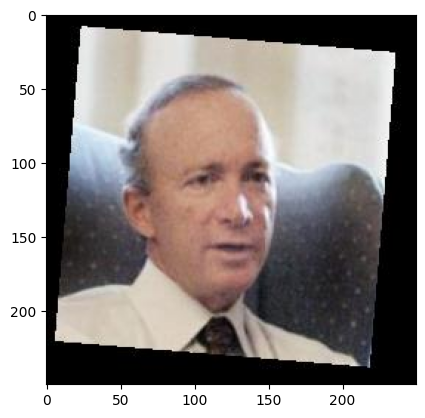

In [17]:
for x,y in dataloader:
    x = x[0].permute(1, 2, 0)
    print(x.shape)
    plt.imshow(x)
    break

## Step 2
Each datapoint is an image. Get a sample of the data and print its dimensions and explain what each dimension means.

torch.Size([250, 250, 3])


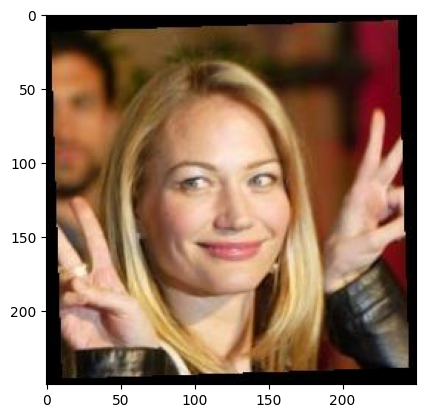

torch.Size([250, 250, 3])


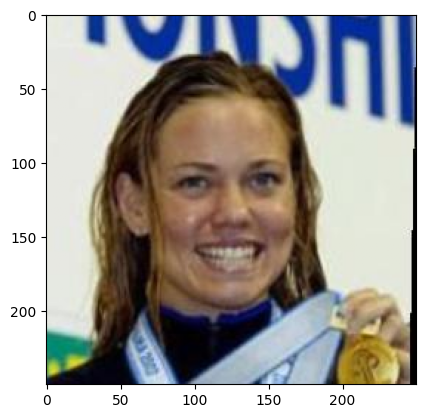

torch.Size([250, 250, 3])


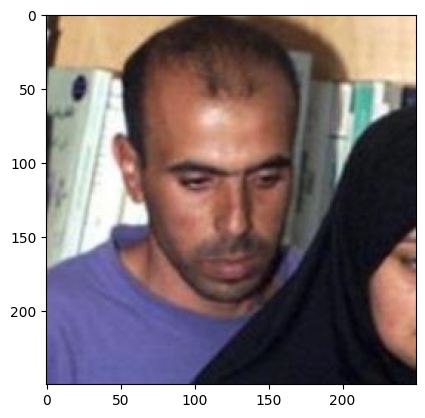

torch.Size([250, 250, 3])


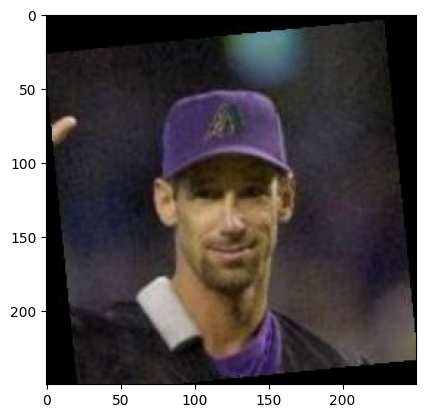

torch.Size([250, 250, 3])


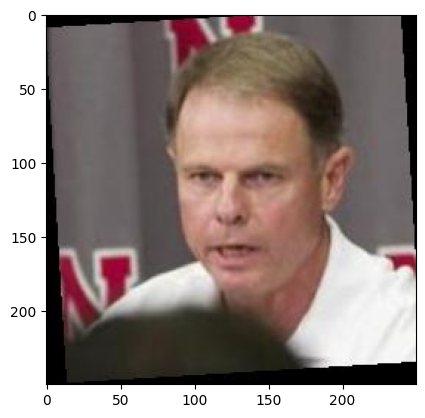

torch.Size([250, 250, 3])


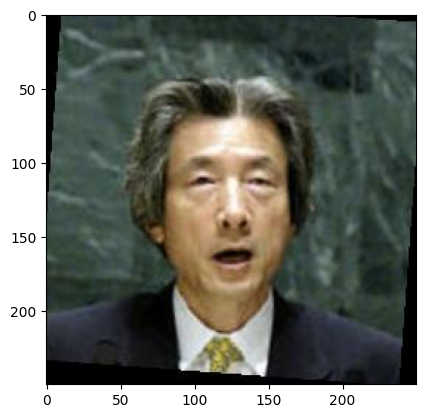

torch.Size([250, 250, 3])


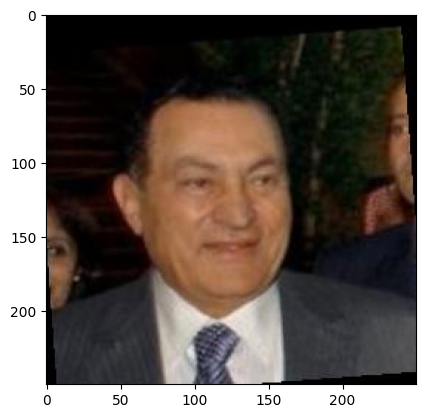

torch.Size([250, 250, 3])


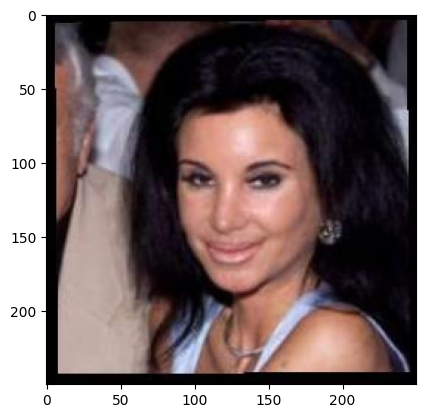

torch.Size([250, 250, 3])


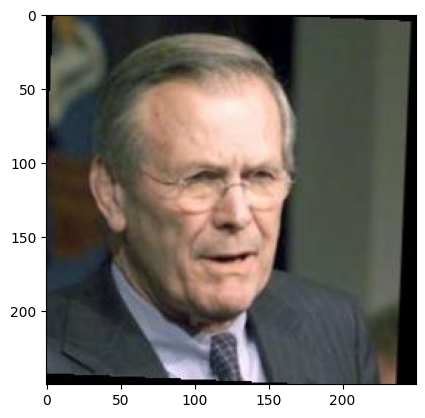

torch.Size([250, 250, 3])


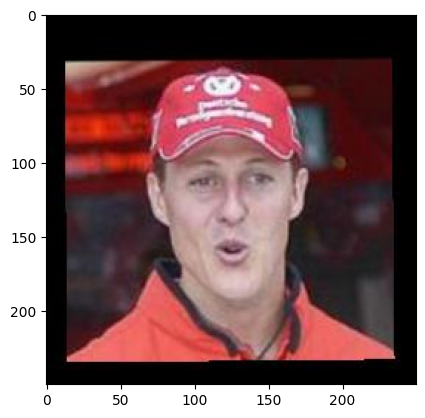

torch.Size([250, 250, 3])


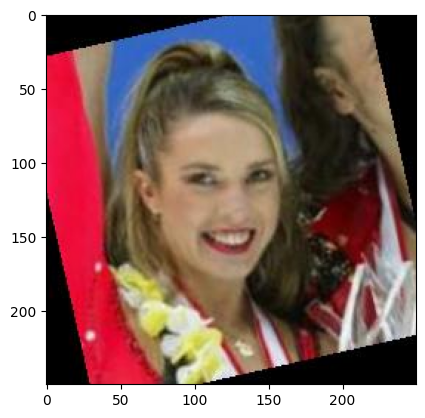

torch.Size([250, 250, 3])


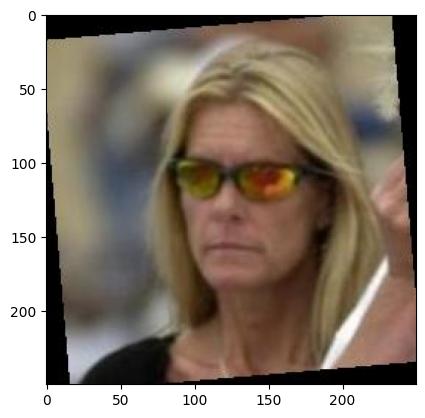

torch.Size([250, 250, 3])


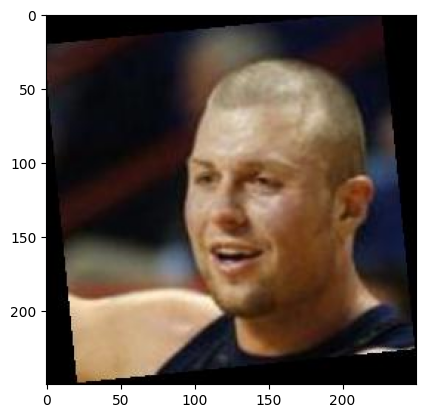

torch.Size([250, 250, 3])


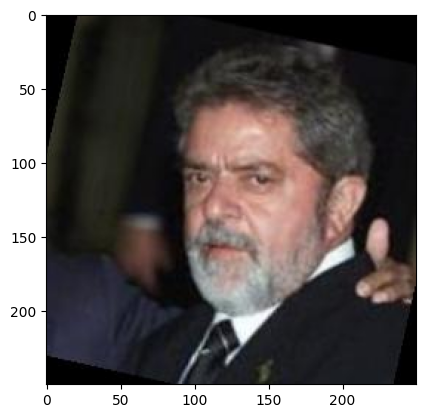

torch.Size([250, 250, 3])


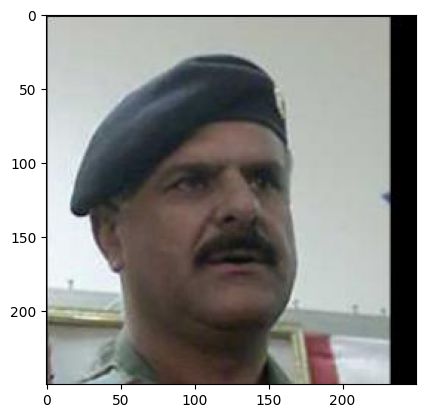

torch.Size([250, 250, 3])


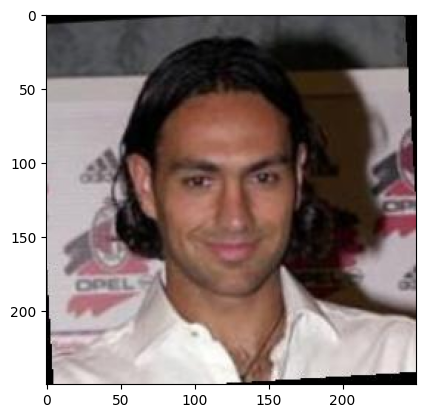

torch.Size([250, 250, 3])


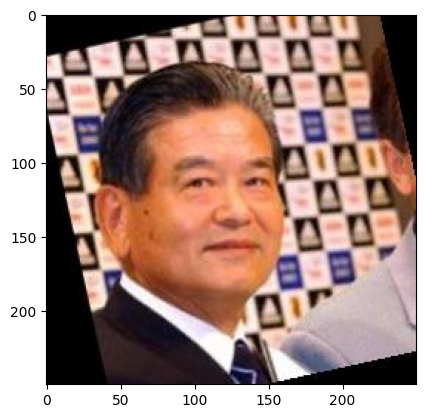

torch.Size([250, 250, 3])


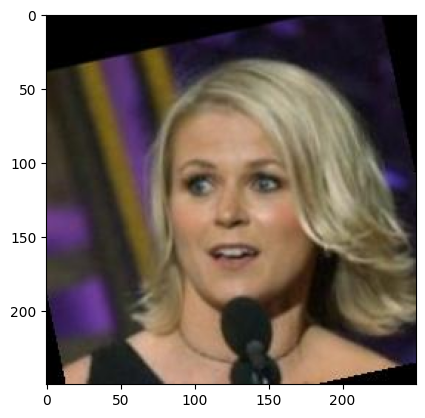

torch.Size([250, 250, 3])


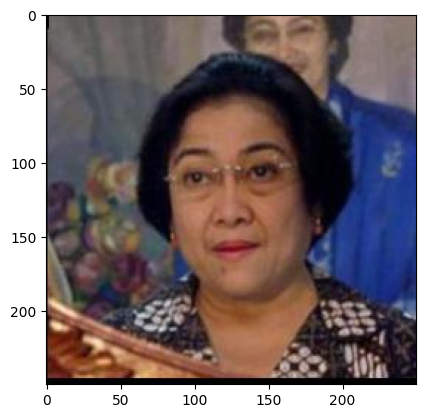

torch.Size([250, 250, 3])


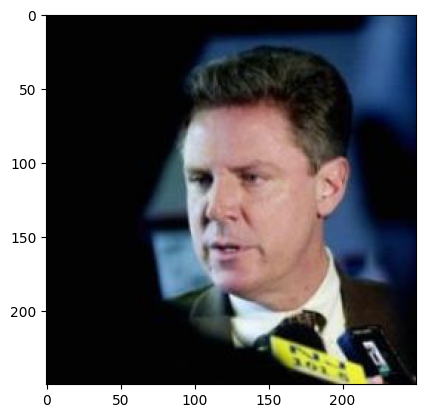

torch.Size([250, 250, 3])


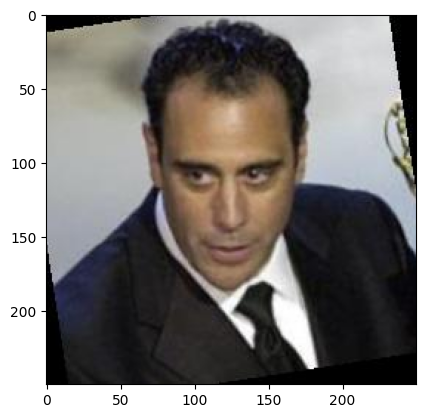

torch.Size([250, 250, 3])


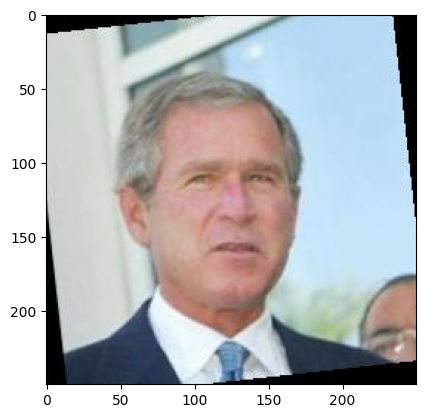

torch.Size([250, 250, 3])


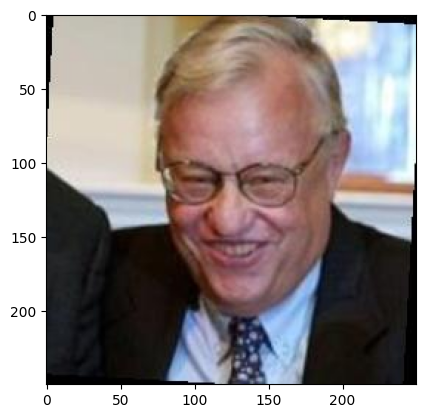

torch.Size([250, 250, 3])


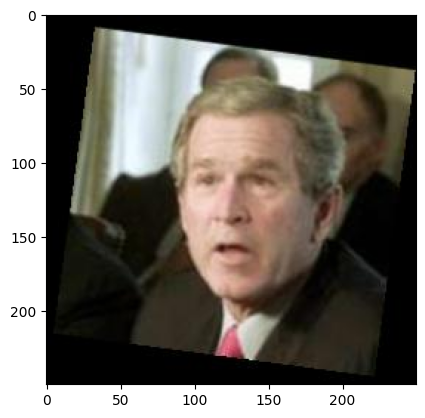

torch.Size([250, 250, 3])


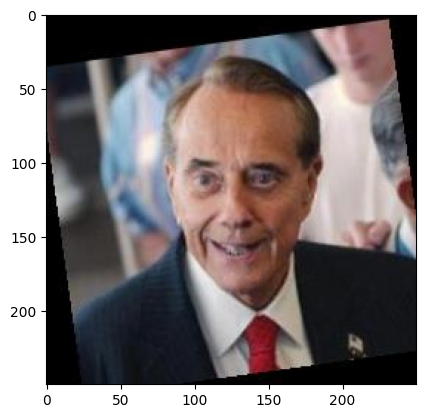

torch.Size([250, 250, 3])


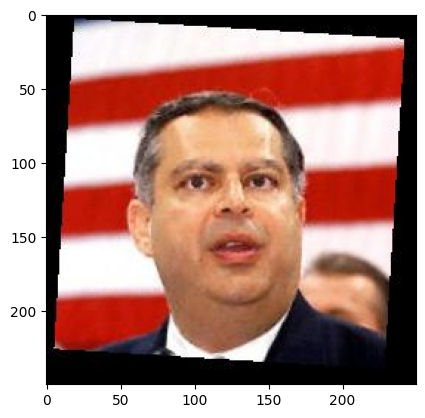

torch.Size([250, 250, 3])


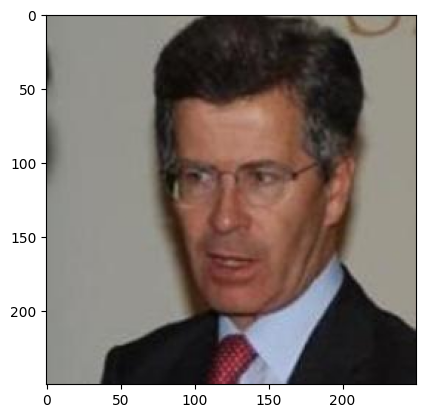

torch.Size([250, 250, 3])


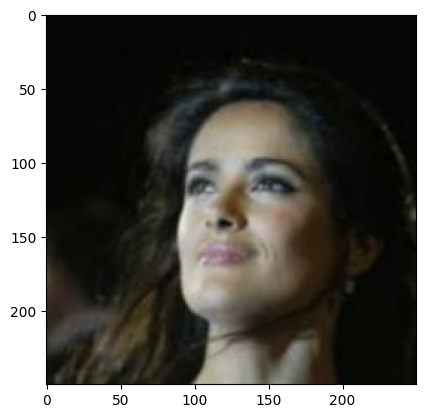

torch.Size([250, 250, 3])


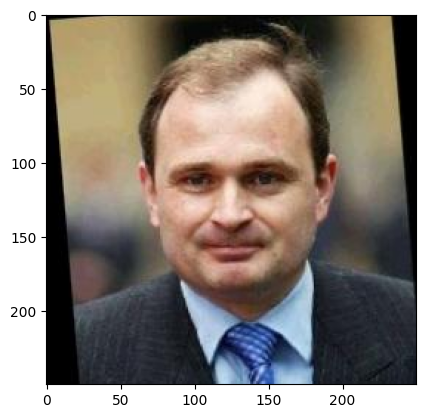

torch.Size([250, 250, 3])


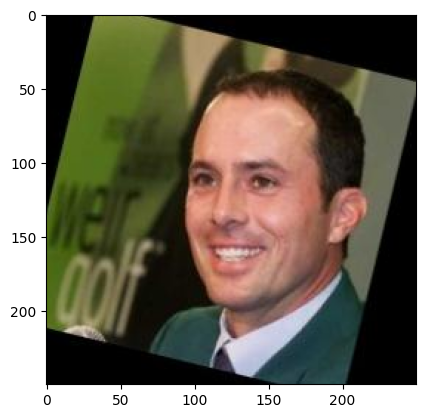

torch.Size([250, 250, 3])


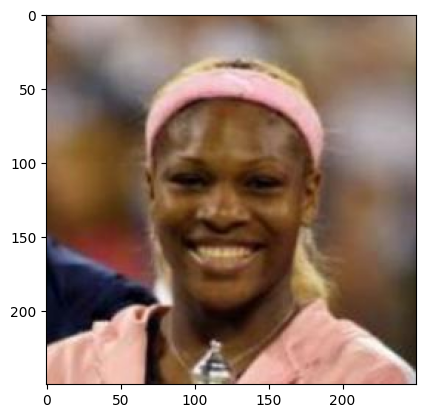

torch.Size([250, 250, 3])


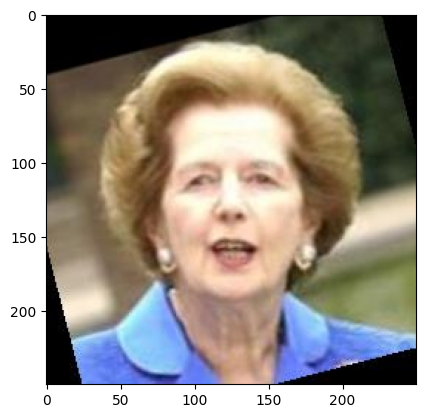

In [29]:
for x,y in dataloader:
    for i in range(x.shape[0]):
        sample = x[i].permute(1, 2, 0)
        print(sample.shape)
        plt.imshow(sample)
        plt.show()
    break




# Step 3

Create a new pytorch model calss for your autoencoder. You can use Conv2d, MaxPool2d, BatchNorm2d, ConvTranspose2d and Linear Layers as as well as activation functions. Optionally, you can use UpSample, AveragePool2d and Interpolate2d as well.

**Create seperate functions for the encoder and decoder.**

In [116]:
class AE(nn.Module):

    def __init__(self):
        super(AE,self).__init__()

         # Define the encoder layers
        self.enc1 = nn.Conv2d(3, 64, 3, padding=1) # 250 x 250
        self.enc2 = nn.MaxPool2d(2, 2) # 125 x 125
        self.enc3 = nn.BatchNorm2d(64)
        self.enc4 = nn.Conv2d(64, 128, 3, padding=1) # 125 x 125
        self.enc5 = nn.MaxPool2d(2, 2) # 62 x 62
        self.enc6 = nn.BatchNorm2d(128)
        self.enc7 = nn.Conv2d(128, 256, 3, padding=1) # 62 x 62
        self.enc8 = nn.MaxPool2d(2, 2) # 31 x 31
        self.enc9 = nn.BatchNorm2d(256)
        # Define the decoder layers
        self.dec1 = nn.ConvTranspose2d(256, 128, 3, stride=2, padding=1, output_padding=1) # 62 x 62
        self.dec2 = nn.BatchNorm2d(128)
        self.dec3 = nn.ConvTranspose2d(128, 64, 3, stride=2, padding=1, output_padding=1) # 125 x 125
        self.dec4 = nn.BatchNorm2d(64)
        self.dec5 = nn.ConvTranspose2d(64, 3, 3, stride=2, padding=1, output_padding=1) # 250 x 250
        self.dec6 = nn.Sigmoid() # To make the output in range [0, 1]
        # Define the activation function
        self.relu = nn.ReLU()

    def encoder(self,x):
        # Apply the encoder layers and the activation function
        x = self.relu(self.enc1(x))
        x = self.enc2(x)
        x = self.enc3(x)
        x = self.relu(self.enc4(x))
        x = self.enc5(x)
        x = self.enc6(x)
        x = self.relu(self.enc7(x))
        x = self.enc8(x)
        x = self.enc9(x)
        return x

    def decoder(self,x):
        # Apply the decoder layers and the activation function
        x = self.relu(self.dec1(x))
        x = self.dec2(x)
        x = self.relu(self.dec3(x))
        x = self.dec4(x)
        x = self.relu(self.dec5(x))
        x = self.dec6(x)
        return x

    def forward(self,x):
        # Encode and decode the input
        x = self.encoder(x)
        x = self.decoder(x)
        return x



## Step 4
Create an instance of the class, pass an image to the model, print the shape of the output of the **encoder** and the **decoder**. Check the dimensions and make sure your forward path is working properly.

In [117]:
model = AE()

In [118]:
for x, y in dataloader:
    # Assuming 'x' is your input image tensor
    print("Input shape:", x.shape)

    # Forward pass through the model
    encoded_output = model.encoder(x)
    decoded_output = model.decoder(encoded_output)

    # Print the shapes of the encoder and decoder outputs
    print("Encoder output shape:", encoded_output.shape)
    print("Decoder output shape:", decoded_output.shape)

    #Not entirely
    # Display the original image
    #original_image = x[0].permute(1, 2, 0).squeeze().numpy()
    #plt.subplot(1, 2, 1)
    #plt.title("Original Image")
    #plt.imshow(original_image, cmap='gray')

    # Display the reconstructed image
    #reconstructed_image = decoded_output[0].detach().permute(1, 2, 0).squeeze().numpy()
    #plt.subplot(1, 2, 2)
    #plt.title("Reconstructed Image")
    #plt.imshow(reconstructed_image, cmap='gray')

    #plt.show()
    break  # Break after the first iteration

Input shape: torch.Size([32, 3, 250, 250])
Encoder output shape: torch.Size([32, 256, 31, 31])
Decoder output shape: torch.Size([32, 3, 248, 248])


##  Step 5
Print total number of parameters in the model, explain what loss function you should use, create an optimizer for training

In [124]:
optim = torch.optim.SGD(model.parameters(), lr=0.01)

In [125]:
loss_function = nn.MSELoss()

##  Step 6
Write a training loop and start trainng the model for several epochs. Report the loss value at the end of each epoch and monitor it. If your loss is not decreasing what do you have to do to troubleshoot it ?

In [126]:
# Define the number of epochs
epochs = 10
# Create a list to store the outputs
outputs = []
# Create a list to store the losses
losses = []
# Loop over the epochs
for epoch in range(epochs):
    # Loop over the batches
    for (image, _) in dataloader:
        # Reshape the image to a vector of size 28*28

        # Pass the image to the model and get the reconstructed image
        reconstructed = model(image)
        # Calculate the loss between the image and the reconstructed image
        loss = loss_function(reconstructed, image)
        # Reset the gradients to zero
        optimizer.zero_grad()
        # Backpropagate the loss
        loss.backward()
        # Update the model parameters
        optimizer.step()
        # Append the loss to the losses list
        losses.append(loss)
        # Append the epoch, image, and reconstructed image to the outputs list
        outputs.append((epoch, image, reconstructed))

RuntimeError: ignored

##  Step 7

Take a random image from the dataset and plot it against the reconstructed (encoded + decoded) image.

In [122]:
plt.imshow()

TypeError: ignored

In [123]:
# Plot the reconstructed images
for k in range(0, epochs, 4):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        item = item.reshape(-1, 28, 28)
        plt.imshow(item[0])

    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1)
        item = item.reshape(-1, 28, 28)
        plt.imshow(item[0])


IndexError: ignored

<Figure size 900x200 with 0 Axes>

##  Step 8

In step 7, add a small normaly distrubuted noise to the latent (hidden) representation of the input image and then decode it again. How is adding noise affecting the decoded image ?